In [1]:
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

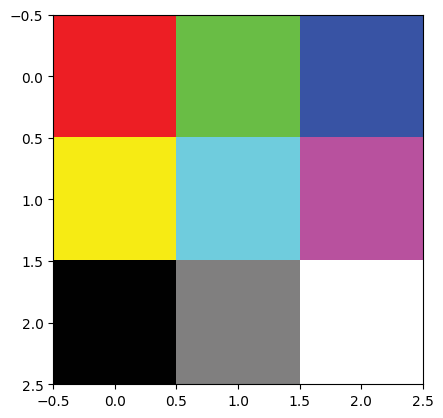

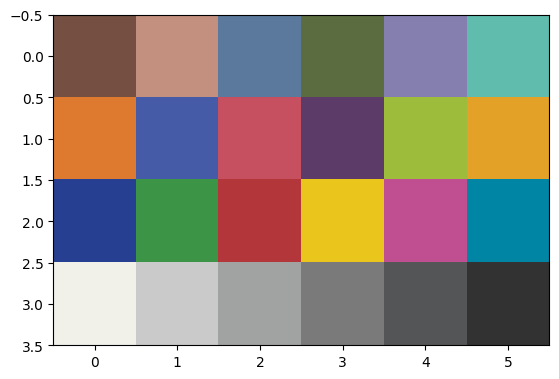

In [2]:
# 推論データ
X =  np.array([
    [0.63, 0.12, 0.07], [0.24, 0.88, 0.22], [0.07, 0.28, 0.40],
    [0.88, 0.99, 0.28], [0.40, 0.98, 0.91], [0.56, 0.20, 0.27],
    [0.00, 0.00, 0.00], [0.28, 0.53, 0.36], [0.97, 1.00, 0.99],

    [0.22, 0.13, 0.06], [0.65, 0.64, 0.36], [0.15, 0.43, 0.42], [0.15, 0.37, 0.10], [0.34, 0.55, 0.55], [0.28, 0.96, 0.68],
    [0.68, 0.38, 0.08], [0.02, 0.25, 0.37], [0.60, 0.14, 0.11], [0.11, 0.05, 0.10], [0.49, 0.97, 0.22], [0.76, 0.74, 0.16],
    [0.01, 0.08, 0.18], [0.08, 0.59, 0.16], [0.49, 0.09, 0.03], [0.83, 0.97, 0.23], [0.59, 0.16, 0.19], [0.09, 0.57, 0.57],
    [1.00, 1.00, 1.00], [0.68, 0.97, 0.74], [0.44, 0.71, 0.49], [0.25, 0.45, 0.30], [0.11, 0.17, 0.13], [0.00, 0.03, 0.01],
    ], dtype=np.float32)

img1 = cv2.resize(cv2.imread("img/reference_image1_cmyk_large.png", cv2.IMREAD_COLOR_RGB), (3,3), interpolation=cv2.INTER_NEAREST)
img2 = cv2.resize(cv2.imread("img/reference_image2_cmyk_large.png", cv2.IMREAD_COLOR_RGB), (6,4), interpolation=cv2.INTER_NEAREST)

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

# 正解データ
Y = np.concatenate([img1.reshape([-1, 3])/255, img2.reshape([-1, 3])/255], axis=0).astype(np.float32)

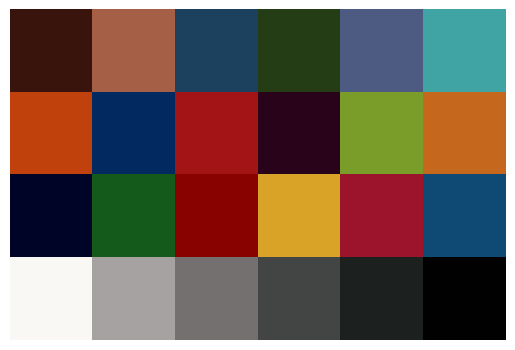

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 元データ
vals = [
    57,20,13,166,95,71,28,65,94,36,61,21,77,90,130,64,164,164,
    193,65,13,3,42,96,163,20,22,40,3,25,122,156,41,197,104,29,
    0,5,39,20,90,27,136,2,0,216,163,38,155,20,43,14,74,115,
    250,248,245,166,162,161,116,112,111,66,69,68,28,33,32,0,1,0
]

# RGBに変換（0〜1）
colors = np.array(vals, dtype=np.float32).reshape(-1, 3) / 255.0

# 必要数は4×6＝24色なので足りない分は黒で補完
if colors.shape[0] < 24:
    padding = np.zeros((24 - colors.shape[0], 3), dtype=np.float32)
    colors = np.vstack([colors, padding])

# 4×6に整形
img = colors.reshape(4, 6, 3)

plt.imshow(img)
plt.axis("off")
plt.show()


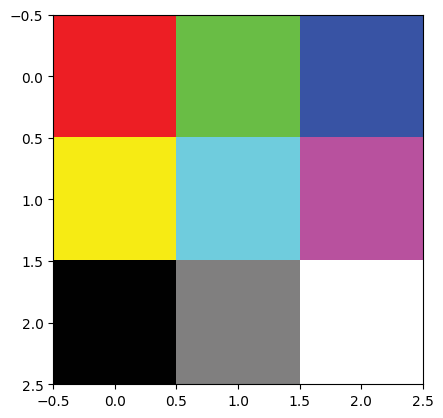

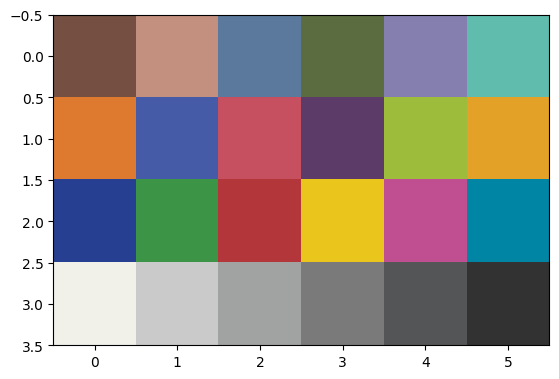

In [4]:
# 推論データ
X = np.array([
    [184/255, 12/255, 7/255],
    [83/255, 151/255, 49/255],
    [22/255, 47/255, 91/255],
    [255/255, 215/255, 44/255],
    [121/255, 178/255, 212/255],
    [178/255, 36/255, 63/255],
    [11/255, 3/255, 0/255],
    [100/255, 87/255, 79/255],
    [255/255, 254/255, 255/255],

    [57/255, 20/255, 13/255],
    [166/255, 95/255, 71/255],
    [28/255, 65/255, 94/255],
    [36/255, 61/255, 21/255],
    [77/255, 90/255, 130/255],
    [64/255, 164/255, 164/255],

    [193/255, 65/255, 13/255],
    [3/255, 42/255, 96/255],
    [163/255, 20/255, 22/255],
    [40/255, 3/255, 25/255],
    [122/255, 156/255, 41/255],
    [197/255, 104/255, 29/255],

    [0/255, 5/255, 39/255],
    [20/255, 90/255, 27/255],
    [136/255, 2/255, 0/255],
    [216/255, 163/255, 38/255],
    [155/255, 20/255, 43/255],
    [14/255, 74/255, 115/255],

    [250/255, 248/255, 245/255],
    [166/255, 162/255, 161/255],
    [116/255, 112/255, 111/255],
    [66/255, 69/255, 68/255],
    [28/255, 33/255, 32/255],
    [0/255, 1/255, 0/255],

], dtype=np.float32)



img1 = cv2.resize(cv2.imread("img/reference_image1_cmyk_large.png", cv2.IMREAD_COLOR_RGB), (3,3), interpolation=cv2.INTER_NEAREST)
img2 = cv2.resize(cv2.imread("img/reference_image2_cmyk_large.png", cv2.IMREAD_COLOR_RGB), (6,4), interpolation=cv2.INTER_NEAREST)

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

# 正解データ
Y = np.concatenate([img1.reshape([-1, 3])/255, img2.reshape([-1, 3])/255], axis=0).astype(np.float32)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

# X, Y はすでに定義済みとします
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

PARAMETER_list = [30,40,50,60,70,80,90,100,200,500,700,1000,1100]

# 保存用ディレクトリ
os.makedirs("h_faile_data", exist_ok=True)

for PARAMETER in PARAMETER_list:

    # モデル定義
    class ColorNet(nn.Module):
        def __init__(self):
            super(ColorNet, self).__init__()
            self.model = nn.Sequential(
                nn.Linear(3, PARAMETER),
                nn.ReLU(),
                nn.Linear(PARAMETER, PARAMETER),
                nn.ReLU(),
                nn.Linear(PARAMETER, 3),
            )

        def forward(self, x):
            return self.model(x)

    model = ColorNet()

    # 損失関数（MSE）
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    lambda_l1 = 1e-6

    # 学習ループ
    epochs = 50000
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        mse = criterion(outputs, Y_tensor)

        # L1正則化
        l1 = torch.tensor(0.0, requires_grad=False)
        for name, p in model.named_parameters():
            if 'weight' in name:
                l1 = l1 + p.abs().sum()
        loss = mse + lambda_l1 * l1

        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'PARAM={PARAMETER}  Epoch [{epoch}/{epochs}]  MSE: {mse.item():.6f}  L1: {l1.item():.2f}  Loss: {loss.item():.6f}')

    # 予測結果
    with torch.no_grad():
        predictions = model(X_tensor)
        print(f"\nPARAM={PARAMETER} 予測結果：")
        print(predictions.numpy())

    # C++用に変換
    def convert_to_cpp_array(tensor: torch.Tensor, name: str, dtype: str = "float"):
        flat = tensor.detach().numpy().flatten()
        array_str = f"{dtype} {name}[] = {{"
        array_str += ", ".join(map(str, flat))
        array_str += "};"
        return array_str

    cpp_code = ""
    layer_idx = 1
    for layer in model.model:
        if isinstance(layer, nn.Linear):
            cpp_code += convert_to_cpp_array(layer.weight, f"weight_{layer_idx}") + "\n"
            cpp_code += convert_to_cpp_array(layer.bias,   f"bias_{layer_idx}") + "\n"
            layer_idx += 1

    #filename = f"h_faile_data/nomal_model_parameters_{PARAMETER}.h"
    with open(filename, "w") as f:
        f.write(cpp_code)

    print(f"C++ 用のパラメータファイル (nomal_model_parameters_{PARAMETER}.h) を作成しました。\n")


PARAM=30  Epoch [0/50000]  MSE: 0.283419  L1: 115.87  Loss: 0.283534
PARAM=30  Epoch [500/50000]  MSE: 0.001947  L1: 94.84  Loss: 0.002042
PARAM=30  Epoch [1000/50000]  MSE: 0.001379  L1: 94.84  Loss: 0.001474
PARAM=30  Epoch [1500/50000]  MSE: 0.001180  L1: 94.87  Loss: 0.001274
PARAM=30  Epoch [2000/50000]  MSE: 0.001135  L1: 94.61  Loss: 0.001229
PARAM=30  Epoch [2500/50000]  MSE: 0.001187  L1: 94.78  Loss: 0.001281
PARAM=30  Epoch [3000/50000]  MSE: 0.001018  L1: 95.39  Loss: 0.001113
PARAM=30  Epoch [3500/50000]  MSE: 0.001002  L1: 97.24  Loss: 0.001099
PARAM=30  Epoch [4000/50000]  MSE: 0.000961  L1: 96.48  Loss: 0.001058
PARAM=30  Epoch [4500/50000]  MSE: 0.000952  L1: 95.98  Loss: 0.001048
PARAM=30  Epoch [5000/50000]  MSE: 0.000929  L1: 95.15  Loss: 0.001024
PARAM=30  Epoch [5500/50000]  MSE: 0.000766  L1: 97.45  Loss: 0.000863
PARAM=30  Epoch [6000/50000]  MSE: 0.000386  L1: 104.34  Loss: 0.000490
PARAM=30  Epoch [6500/50000]  MSE: 0.000190  L1: 108.15  Loss: 0.000298
PARAM=3

In [9]:
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

PARAMETER = 

# モデル定義
class ColorNet(nn.Module):
    def __init__(self):
        super(ColorNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3,PARAMETER),
            nn.ReLU(),
            nn.Linear(PARAMETER, PARAMETER),
            nn.ReLU(),
            nn.Linear(PARAMETER, 3),
        )

    def forward(self, x):
        return self.model(x)

model = ColorNet()

# 損失関数（MSE）
criterion = nn.MSELoss()

# 最適化手法
optimizer = optim.Adam(model.parameters(), lr=0.01)

# L1正則化の係数
lambda_l1 = 1e-6

# 学習ループ
epochs = 50000
for epoch in range(epochs):
    optimizer.zero_grad()

    outputs = model(X_tensor)
    mse = criterion(outputs, Y_tensor)

    # --- L1 正則化-----------------------------
    l1 = torch.tensor(0.0, requires_grad=False)
    for name, p in model.named_parameters():
        if 'weight' in name:
            l1 = l1 + p.abs().sum()
    loss = mse + lambda_l1 * l1
    # -----------------------------------------

    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch [{epoch}/{epochs}]  MSE: {mse.item():.6f}  L1: {l1.item():.2f}  Loss: {loss.item():.6f}')

with torch.no_grad():
    predictions = model(X_tensor)
    print("\n予測結果：")
    print(predictions.numpy())

def convert_to_cpp_array(tensor: torch.Tensor, name: str, dtype: str = "float"):
    flat = tensor.detach().numpy().flatten()
    array_str = f"{dtype} {name}[] = {{"
    array_str += ", ".join(map(str, flat))
    array_str += "};"
    return array_str

cpp_code = ""

layer_idx = 1
for layer in model.model:
    if isinstance(layer, torch.nn.Linear):
        cpp_code += convert_to_cpp_array(layer.weight, f"weight_{layer_idx}") + "\n"
        cpp_code += convert_to_cpp_array(layer.bias,   f"bias_{layer_idx}") + "\n"
        layer_idx += 1

filename = f"h_faile_data/nomal_model_parameters_{PARAMETER}.h"

with open(filename, "w") as f:
    f.write(cpp_code)

print("\nC++ 用のパラメータファイル (nomal_model_parameters_1.h.h) を作成しました。")


Epoch [0/50000]  MSE: 0.418853  L1: 300.60  Loss: 0.419154
Epoch [500/50000]  MSE: 0.000592  L1: 235.06  Loss: 0.000827
Epoch [1000/50000]  MSE: 0.000080  L1: 220.60  Loss: 0.000300
Epoch [1500/50000]  MSE: 0.000088  L1: 199.71  Loss: 0.000288
Epoch [2000/50000]  MSE: 0.000018  L1: 181.23  Loss: 0.000199
Epoch [2500/50000]  MSE: 0.000035  L1: 166.33  Loss: 0.000201
Epoch [3000/50000]  MSE: 0.000016  L1: 154.43  Loss: 0.000170
Epoch [3500/50000]  MSE: 0.000030  L1: 143.56  Loss: 0.000174
Epoch [4000/50000]  MSE: 0.000008  L1: 136.68  Loss: 0.000144
Epoch [4500/50000]  MSE: 0.000086  L1: 127.94  Loss: 0.000214
Epoch [5000/50000]  MSE: 0.000015  L1: 121.57  Loss: 0.000137
Epoch [5500/50000]  MSE: 0.000005  L1: 116.37  Loss: 0.000122
Epoch [6000/50000]  MSE: 0.000040  L1: 112.64  Loss: 0.000153
Epoch [6500/50000]  MSE: 0.000082  L1: 108.61  Loss: 0.000191
Epoch [7000/50000]  MSE: 0.000021  L1: 105.39  Loss: 0.000127
Epoch [7500/50000]  MSE: 0.000031  L1: 102.12  Loss: 0.000133
Epoch [8000/

In [10]:
import torch
import numpy as np
from scipy.sparse import csr_matrix

THRESHOLD = 0.005
filename = f"model_sparse_csr_int8/model_sparse{THRESHOLD}_csr_int8_param60.h"

# --- スパース化（小さい値を0にする） ---
def sparsify_array(arr: np.ndarray, threshold: float = THRESHOLD):
    arr_copy = arr.copy()
    arr_copy[np.abs(arr_copy) < threshold] = 0
    return arr_copy

# --- int8量子化関数 ---
def int8_quantize(arr: np.ndarray, scale=None):
    if scale is None:
        max_abs = float(np.max(np.abs(arr)))
        scale = max_abs / 127.0 if max_abs != 0 else 1.0
    q = np.round(arr / scale).astype(np.int32)
    q = np.clip(q, -128, 127).astype(np.int8)
    return q, scale


# --- 配列を量子化する共通関数 ---
def quantize_array(arr: np.ndarray, threshold: float = THRESHOLD):
    arr_sparse = sparsify_array(arr, threshold)
    nonzero_mask = arr_sparse != 0
    q_data, scale = int8_quantize(arr_sparse[nonzero_mask])
    arr_quantized = np.zeros_like(arr_sparse, dtype=np.int8)
    arr_quantized[nonzero_mask] = q_data
    return arr_quantized, scale

# --- CSR配列生成関数 ---
def to_csr(tensor: torch.Tensor, name: str, threshold: float = THRESHOLD):
    arr = tensor.detach().numpy()
    arr_quantized, scale = quantize_array(arr, threshold)
    csr = csr_matrix(arr_quantized)

    data_str = f"int8_t {name}_data[] = {{ " + ", ".join(map(str, csr.data)) + " };"
    indices_str = f"int {name}_indices[] = {{ " + ", ".join(map(str, csr.indices)) + " };"
    indptr_str = f"int {name}_indptr[] = {{ " + ", ".join(map(str, csr.indptr)) + " };"
    shape_str = f"int {name}_shape[2] = {{{csr.shape[0]}, {csr.shape[1]}}};"
    scale_str = f"float {name}_scale = {scale};"

    return "\n".join([data_str, indices_str, indptr_str, shape_str, scale_str])

# --- Dense配列生成関数 ---
def to_dense(tensor: torch.Tensor, name: str, threshold: float = THRESHOLD):
    arr = tensor.detach().numpy().flatten()
    arr_quantized, scale = quantize_array(arr, threshold)
    array_str = f"int8_t {name}[] = {{ " + ", ".join(map(str, arr_quantized)) + " };"
    scale_str = f"float {name}_scale = {scale};"
    return "\n".join([array_str, scale_str])

# --- C++コード生成 ---
cpp_code = ""
layer_idx = 1

for layer in model.model:
    if isinstance(layer, torch.nn.Linear):
        cpp_code += f"// Layer {layer_idx}\n"
        cpp_code += to_csr(layer.weight, f"weight_{layer_idx}") + "\n"
        cpp_code += to_dense(layer.bias, f"bias_{layer_idx}") + "\n\n"
        layer_idx += 1

with open(filename, "w") as f:
    f.write(cpp_code)

print("\nC++ 用のCSR + int8 量子化パラメータファイルを作成しました。")



C++ 用のCSR + int8 量子化パラメータファイルを作成しました。


In [25]:
# --- 個別適用用の関数群 ---

# 1. スパース化のみを適用したものを出力する関数
def to_sparse_only(tensor: torch.Tensor, name: str, threshold: float = 0.005):
    """
    スパース化のみを適用（float型のまま）
    """
    arr = tensor.detach().numpy()
    arr_sparse = sparsify_array(arr, threshold)
    
    # Dense形式で出力（float型）
    flat = arr_sparse.flatten()
    array_str = f"float {name}[] = {{ " + ", ".join(map(str, flat)) + " };"
    shape_str = f"int {name}_shape[2] = {{{arr_sparse.shape[0]}, {arr_sparse.shape[1]}}};"
    
    return "\n".join([array_str, shape_str])

# 2. 量子化のみを適用したものを出力する関数（スパース化なし）
def to_quantize_only(tensor: torch.Tensor, name: str, scale=None):
    """
    量子化のみを適用（スパース化なし、元の配列をそのまま量子化）
    """
    arr = tensor.detach().numpy()
    
    # スパース化せずに直接量子化
    if scale is None:
        max_abs = float(np.max(np.abs(arr)))
        scale = max_abs / 127.0 if max_abs != 0 else 1.0
    
    arr_quantized, scale = int8_quantize(arr, scale)
    
    # Dense形式で出力（int8型）
    flat = arr_quantized.flatten()
    array_str = f"int8_t {name}[] = {{ " + ", ".join(map(str, flat)) + " };"
    scale_str = f"float {name}_scale = {scale};"
    shape_str = f"int {name}_shape[2] = {{{arr_quantized.shape[0]}, {arr_quantized.shape[1]}}};"
    
    return "\n".join([array_str, scale_str, shape_str])

# 3. CSR化のみを適用したものを出力する関数（スパース化・量子化なし、float型のまま）
def to_csr_only(tensor: torch.Tensor, name: str):
    """
    CSR化のみを適用（スパース化・量子化なし、元のfloat型のまま）
    """
    arr = tensor.detach().numpy()
    csr = csr_matrix(arr)

    data_str = f"float {name}_data[] = {{ " + ", ".join(map(str, csr.data)) + " };"
    indices_str = f"int {name}_indices[] = {{ " + ", ".join(map(str, csr.indices)) + " };"
    indptr_str = f"int {name}_indptr[] = {{ " + ", ".join(map(str, csr.indptr)) + " };"
    shape_str = f"int {name}_shape[2] = {{{csr.shape[0]}, {csr.shape[1]}}};"

    return "\n".join([data_str, indices_str, indptr_str, shape_str])

# --- 各手法を個別に適用してファイル出力 ---

# スパース化のみ
cpp_code_sparse = ""
layer_idx = 1
for layer in model.model:
    if isinstance(layer, torch.nn.Linear):
        cpp_code_sparse += f"// Layer {layer_idx} - Sparse Only\n"
        cpp_code_sparse += to_sparse_only(layer.weight, f"weight_{layer_idx}") + "\n"
        # biasはスパース化しない（通常はそのまま）
        bias_arr = layer.bias.detach().numpy()
        bias_str = f"float bias_{layer_idx}[] = {{ " + ", ".join(map(str, bias_arr)) + " };"
        cpp_code_sparse += bias_str + "\n\n"
        layer_idx += 1

with open("model_sparse//model_parameters_sparse_only_0.005.h", "w") as f:
    f.write(cpp_code_sparse)
print("スパース化のみ適用: model_parameters_sparse_only.h を作成しました。")

# 量子化のみ
cpp_code_quantize = ""
layer_idx = 1
for layer in model.model:
    if isinstance(layer, torch.nn.Linear):
        cpp_code_quantize += f"// Layer {layer_idx} - Quantize Only\n"
        cpp_code_quantize += to_quantize_only(layer.weight, f"weight_{layer_idx}") + "\n"
        # biasも量子化
        bias_arr = layer.bias.detach().numpy()
        bias_quantized, bias_scale = int8_quantize(bias_arr)
        bias_str = f"int8_t bias_{layer_idx}[] = {{ " + ", ".join(map(str, bias_quantized)) + " };"
        bias_scale_str = f"float bias_{layer_idx}_scale = {bias_scale};"
        cpp_code_quantize += bias_str + "\n" + bias_scale_str + "\n\n"
        layer_idx += 1

with open("models/model_parameters_quantize_only.h", "w") as f:
    f.write(cpp_code_quantize)
print("量子化のみ適用: model_parameters_quantize_only.h を作成しました。")

# CSR化のみ
cpp_code_csr = ""
layer_idx = 1
for layer in model.model:
    if isinstance(layer, torch.nn.Linear):
        cpp_code_csr += f"// Layer {layer_idx} - CSR Only\n"
        cpp_code_csr += to_csr_only(layer.weight, f"weight_{layer_idx}") + "\n"
        # biasはDense形式のまま
        bias_arr = layer.bias.detach().numpy()
        bias_str = f"float bias_{layer_idx}[] = {{ " + ", ".join(map(str, bias_arr)) + " };"
        cpp_code_csr += bias_str + "\n\n"
        layer_idx += 1

with open("models/model_parameters_csr_only.h", "w") as f:
    f.write(cpp_code_csr)
print("CSR化のみ適用: model_parameters_csr_only.h を作成しました。")


スパース化のみ適用: model_parameters_sparse_only.h を作成しました。
量子化のみ適用: model_parameters_quantize_only.h を作成しました。
CSR化のみ適用: model_parameters_csr_only.h を作成しました。
